<a href="https://colab.research.google.com/github/AnjanaPrakash007/Advanced-Machine-Learning--Lab/blob/main/Tweet_Emotion_Recognition_Learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.3 MB/s eta 0:00:00


In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.15.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
!pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.

In [ ]:
from datasets import load_dataset
dataset = load_dataset('emotion')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
train=dataset['train']

In [ ]:
val=dataset['validation']

In [ ]:
test=dataset['test']

In [ ]:
def get_tweet(data):
  tweets=[x['text']for x in data]
  labels=[x['label']for x in data]
  return tweets,labels

In [ ]:
tweets,labels=get_tweet(train)

In [ ]:
print(labels)

[0, 0, 3, 2, 3, 0, 5, 4, 1, 2, 0, 1, 3, 0, 1, 1, 0, 0, 0, 4, 3, 4, 1, 1, 3, 0, 0, 0, 3, 1, 1, 4, 5, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 3, 1, 0, 3, 4, 1, 0, 0, 5, 1, 1, 1, 2, 4, 4, 5, 3, 3, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 3, 0, 3, 3, 3, 1, 1, 1, 1, 0, 4, 2, 3, 0, 3, 2, 0, 1, 1, 0, 3, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 4, 4, 4, 0, 2, 1, 1, 2, 4, 5, 1, 1, 1, 1, 3, 4, 1, 3, 2, 3, 0, 1, 0, 3, 1, 5, 0, 3, 3, 0, 1, 4, 1, 1, 4, 0, 5, 5, 1, 3, 4, 3, 0, 3, 0, 4, 0, 1, 5, 4, 1, 3, 1, 3, 1, 4, 4, 0, 1, 1, 0, 5, 1, 4, 1, 0, 1, 1, 1, 4, 1, 5, 1, 3, 0, 0, 1, 3, 0, 1, 1, 5, 1, 4, 1, 4, 0, 4, 2, 0, 4, 2, 0, 0, 3, 1, 2, 3, 0, 5, 3, 1, 0, 3, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 3, 5, 1, 3, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 4, 0, 3, 0, 3, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 3, 2, 0, 2, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 1, 2, 0, 3, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 4, 0, 4, 1, 1, 4, 1, 3, 3, 2, 0, 5, 1, 3, 0, 0, 3, 2, 5, 0, 2, 1, 3, 1, 0, 0, 1, 1, 4, 0, 3, 1, 2, 1, 1, 

In [ ]:
label_names = dataset['train'].features['label'].names


In [ ]:
label_names

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [ ]:
tweets[5],label_names[5]

('ive been feeling a little burdened lately wasnt sure why that was',
 'surprise')

## Task 4: Tokenizer

1. Tokenizing the tweets

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer=Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [ ]:
tokenizer.texts_to_sequences([tweets[5]])

[[73, 48, 8, 7, 56, 521, 319, 328, 158, 161, 9, 20]]

In [ ]:
tweets[5]

'ive been feeling a little burdened lately wasnt sure why that was'

most frequent 10000 words tokenized as this

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

(array([  8.,  45., 310., 488., 539., 625., 626., 629., 613., 636., 654.,
        655., 608., 622., 609., 603., 559., 535., 530., 510., 452., 430.,
        382., 385., 330., 327., 336., 317., 238., 208., 200., 200., 167.,
        157., 141., 144., 120., 117., 117.,  88.,  96.,  72.,  66.,  66.,
         65.,  52.,  37.,  43.,  30.,  32.,  31.,  26.,  30.,  20.,  23.,
         14.,   9.,  10.,   4.,   4.,   4.,   1.,   4.,   1.]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
        41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
        54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66.]),
 <BarContainer object of 64 artists>)

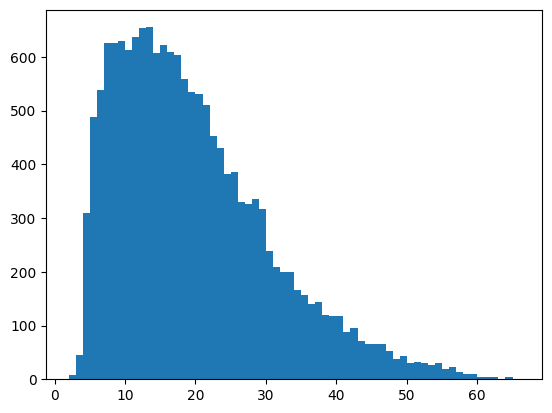

In [ ]:
lengths=[len(t.split(' ')) for t in tweets]
plt.hist(lengths,bins=len(set(lengths)))

In [ ]:
maxlen=50
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def get_sequences(tokenizer,tweets):
  sequences=tokenizer.texts_to_sequences(tweets)
  padded=pad_sequences(sequences,truncating='post',padding='post',maxlen=maxlen)
  return padded

In [ ]:
padded_train_sequences=get_sequences(tokenizer,tweets)

In [ ]:
padded_train_sequences[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [ ]:
classes=set(label_names)
print(classes)

{'surprise', 'anger', 'joy', 'sadness', 'fear', 'love'}


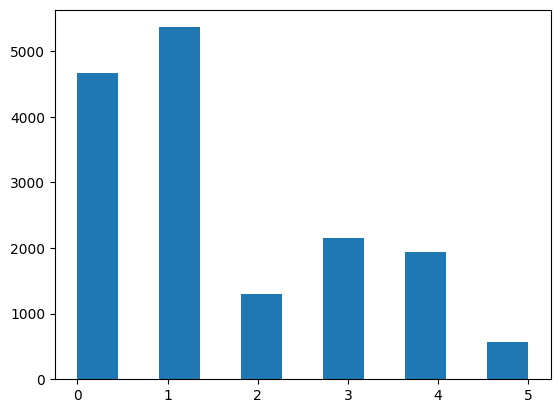

In [ ]:
plt.hist(labels,bins=11)
plt.show()

In [ ]:
classes_to_index=dict((c,i) for i,c in enumerate(classes))
index_to_classes=dict((v,k)for k,v in classes_to_index.items())

In [ ]:
classes_to_index

{'surprise': 0, 'anger': 1, 'joy': 2, 'sadness': 3, 'fear': 4, 'love': 5}

In [ ]:
names_to_ids=lambda labels:np.array([classes_to_index.get(x)for x in labels])

In [ ]:
labels_mapped = [label_names[label] for label in labels]


In [ ]:
names_to_ids

<function __main__.<lambda>(labels)>

In [ ]:
train_labels=names_to_ids(labels_mapped)


In [ ]:
print(train_labels[0])

3


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Embedding(10000,16,input_length=50)
,tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True))
,tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20))
,tf.keras.layers.Dense(6,activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirection  (None, 50, 40)            5920      
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 40)                9760      
 onal)                                                           
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175926 (687.21 KB)
Trainable params: 175926 (687.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [ ]:
val_labels_mapped = [label_names[label] for label in val_labels]
val_labels_ids = names_to_ids(val_labels_mapped)


In [ ]:
val_tweets,val_labels=get_tweet(val)
val_seq=get_sequences(tokenizer,val_tweets)
val_labels=names_to_ids(val_labels_mapped)

In [ ]:
val_labels[0]

3

In [ ]:
val_tweets[0],val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 3)

In [ ]:
h=model.fit(padded_train_sequences,train_labels,validation_data=(val_seq,val_labels)
,epochs=20,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2)])


Epoch 1/20
500/500 [==============================] - 36s 54ms/step - loss: 1.3347 - accuracy: 0.4694 - val_loss: 0.8649 - val_accuracy: 0.6620
Epoch 2/20
500/500 [==============================] - 9s 18ms/step - loss: 0.6381 - accuracy: 0.7704 - val_loss: 0.6519 - val_accuracy: 0.7800
Epoch 3/20
500/500 [==============================] - 15s 29ms/step - loss: 0.3681 - accuracy: 0.8858 - val_loss: 0.4914 - val_accuracy: 0.8435
Epoch 4/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2486 - accuracy: 0.9264 - val_loss: 0.4526 - val_accuracy: 0.8660
Epoch 5/20
500/500 [==============================] - 7s 14ms/step - loss: 0.1841 - accuracy: 0.9469 - val_loss: 0.4446 - val_accuracy: 0.8610
Epoch 6/20
500/500 [==============================] - 7s 14ms/step - loss: 0.1429 - accuracy: 0.9566 - val_loss: 0.5023 - val_accuracy: 0.8550


## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

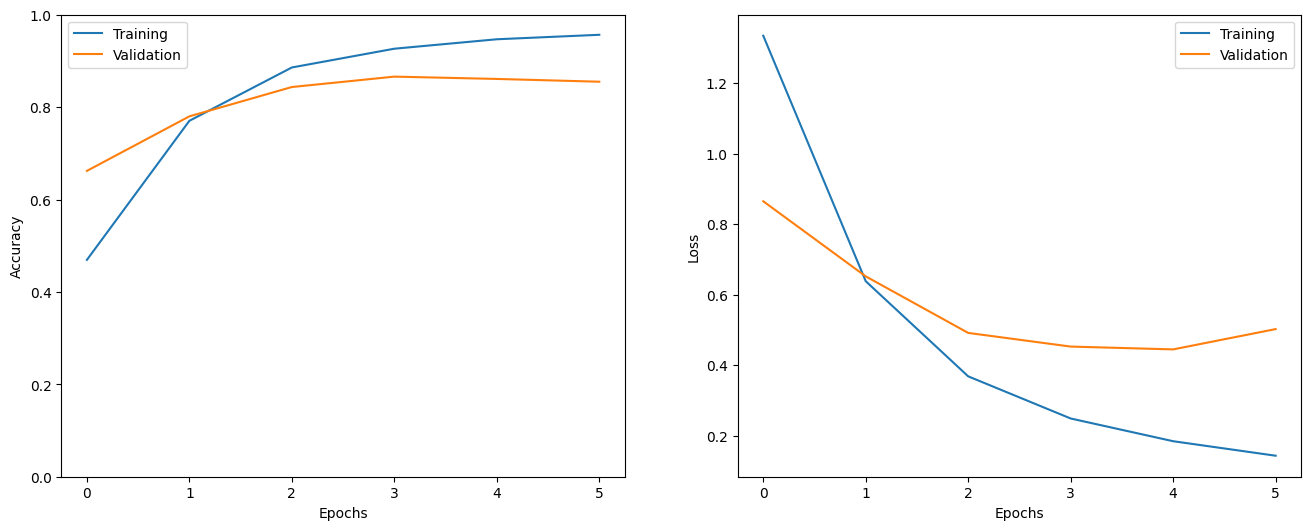

In [ ]:
show_history(h)

In [ ]:


test_labels_mapped = [label_names[label] for label in test_labels]
test_labels_ids = names_to_ids(test_labels_mapped)


In [ ]:
test_tweets,test_labels=get_tweet(test)
test_sequences=get_sequences(tokenizer,test_tweets)
test_labels=names_to_ids(test_labels_mapped)

In [ ]:
_=model.evaluate(test_sequences,test_labels)

63/63 [==============================] - 1s 8ms/step - loss: 0.4755 - accuracy: 0.8500


In [ ]:
i=random.randint(0,len(test_labels)-1)
print('Sentence:',test_tweets[i])
print('Emotion:',test_labels_mapped[i])

p=model.predict(np.expand_dims(test_sequences[i],axis=0))[0]
classes_list = list(classes)

pred_class=classes_list[np.argmax(p).astype('uint8')]

print('Predicted Emotion:',pred_class)

Sentence: i have power feeling to justify their laziness and being bitchy against skinny girls
Emotion: anger
1/1 [==============================] - 0s 20ms/step
Predicted Emotion: anger


In [ ]:
preds=model.predict(test_sequences)

63/63 [==============================] - 1s 8ms/step


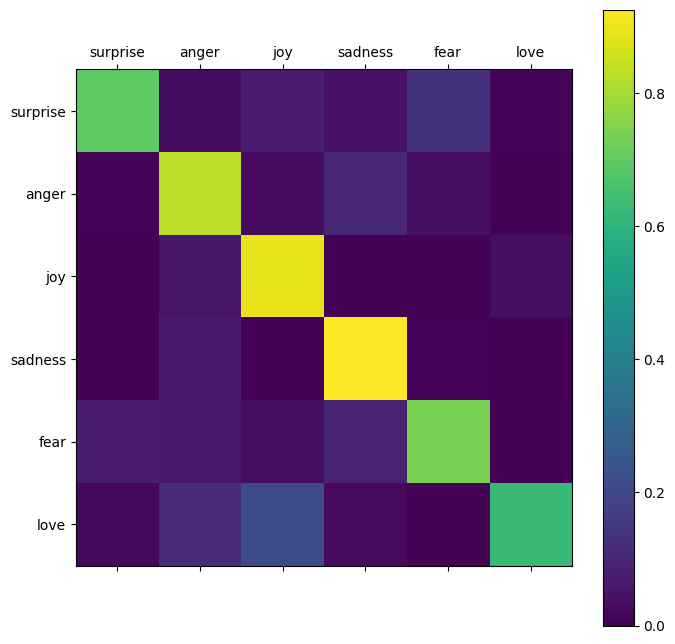

In [ ]:
show_confusion_matrix(test_labels,preds.argmax(axis=1),classes)